# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_sphere.pickle') as f:
        model_sphere = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (50,25)
Number of data: 1250.0
dx: 244.9 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_sphere['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 40.0 degree
Main field declination: 45.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_sphere['m_R']
print 'Inclination: %.1f degree' % model_sphere['inc_R']
print 'Declination: %.1f degree' % model_sphere['dec_R']

Intensity: 3.0 A/m
Inclination: 30.0 degree
Declination: 20.0 degree


In [16]:
inc_R,dec_R = model_sphere['inc_R'],model_sphere['dec_R']

## Generating the layer with my function 

In [17]:
h = 1150.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e3,1e4,1e5,5*1e5,1e6,1e7]

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_sphere_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_sphere_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-0.583817314014 -4.58883766148
i = 1
4.47376644574 -3.21968334343
i = 2
7.19098095501 -2.34653589553
i = 3
9.1178675872 -1.60117402293
i = 4
10.6334033932 -0.968638117374
i = 5
11.8933718772 -0.366425298965
i = 6
12.9746302983 0.230615932769
i = 7
13.9147652787 0.812497297207
i = 8
14.7452550465 1.37442788785
i = 9
15.4860159421 1.90775817816
i = 10
16.150358727 2.40985271271
i = 11
16.7508208836 2.88244565268
i = 12
17.2985650065 3.33019729348
i = 13
17.8013530749 3.76052087267
i = 14
18.2646872994 4.17660174528
i = 15
18.6928521882 4.57732234864
i = 16
19.0893626178 4.96173192475
i = 17
19.4574175619 5.32864370869
i = 18
19.8000451545 5.6780501671
i = 19
20.1202771228 6.0116385869
i = 20
20.4206731857 6.33247616308
i = 21
20.7028703905 6.63976361593
i = 22
20.96853683 6.9331427109
i = 23
21.2190938548 7.21237720507
i = 24
21.4559799456 7.47837882003
i = 25
21.6807843999 7.734564857
i = 26
21.894575562 7.98241924719
i = 27
22.0981659499 8.22228109705
i = 28
22.2922406452 8.45462

26.4762322424 13.5587364548
i = 70
26.5370953147 13.6337441885
i = 71
26.5969716047 13.7074612685
i = 72
26.6558874764 13.7799033817
i = 73
26.7138715844 13.8510940646
i = 74
26.7709703757 13.9210975701
i = 75
26.8272336931 13.9899373759
i = 76
26.8826764689 14.0576303051
i = 77
26.937302119 14.1242248341
i = 78
26.9911271636 14.1897829639
i = 79
27.0441716253 14.2543472277
i = 80
27.0964725707 14.3179748808
i = 81
27.1480519374 14.3807280205
i = 82
27.1989260232 14.4426213533
i = 83
27.2491095223 14.5036688591
i = 84
27.2986258516 14.5638851108
i = 85
27.3474914094 14.6232811459
i = 86
27.3957221147 14.6818695204
i = 87
27.4433339203 14.7396568216
i = 88
27.4903336042 14.7968394136
i = 89
27.53674734 14.8534446473
i = 90
27.5825958432 14.909480087
i = 91
27.6278886394 14.9649523227
i = 92
27.672635227 15.0198678144
i = 93
27.7168447979 15.0742358989
i = 94
27.7605275592 15.1280625252
i = 95
27.8036923425 15.1813474815
i = 96
27.8463413234 15.234081418
i = 97
27.8884786927 15.286246094

29.2728121172 17.0505148063
i = 138
29.3001515448 17.0861196172
i = 139
29.3272248533 17.1214157091
i = 140
29.354035155 17.1564055551
i = 141
29.380585877 17.1910919534
i = 142
29.4068803893 17.2254776724
i = 143
29.4329238933 17.2595861537
i = 144
29.4587209624 17.2934223027
i = 145
29.4842745999 17.3269885219
i = 146
29.5095876808 17.3602883465
i = 147
29.5346631558 17.3933240702
i = 148
29.5595056722 17.4260978495
i = 149
29.5841190085 17.4586118255
i = 150
29.6085058517 17.4908684664
i = 151
29.6326688535 17.5228701103
i = 152
29.6566105313 17.55461839
i = 153
29.6803331793 17.5861140661
i = 154
29.7038393575 17.6173592227
i = 155
29.7271315885 17.6483559234
i = 156
29.7502135369 17.6791092322
i = 157
29.7730883185 17.7096228856
i = 158
29.7957583032 17.7398987837
i = 159
29.8182258268 17.7699388093
i = 160
29.8404931918 17.7997448284
i = 161
29.8625626684 17.82931869
i = 162
29.8844363963 17.8586628003
i = 163
29.9061160307 17.8877821532
i = 164
29.9276032859 17.9166739072
i = 16

24.3114234092 11.2469125324
i = 36
24.4636222419 11.4202201789
i = 37
24.6110655758 11.5873950402
i = 38
24.7540299175 11.7486899369
i = 39
24.8927736331 11.9044690295
i = 40
25.0275276764 12.0547977429
i = 41
25.1585271396 12.199805807
i = 42
25.2860318805 12.3398127204
i = 43
25.4102345053 12.4749473855
i = 44
25.5316244256 12.6069081616
i = 45
25.6503450323 12.735854172
i = 46
25.7665140835 12.8618548649
i = 47
25.88025813 12.9849718901
i = 48
25.9916766915 13.1052689441
i = 49
26.1008648797 13.2227847879
i = 50
26.207911893 13.3375950347
i = 51
26.3129226206 13.4497674733
i = 52
26.4159866264 13.559484167
i = 53
26.5171949991 13.6669064653
i = 54
26.6166120454 13.7721036928
i = 55
26.7142958869 13.8751625485
i = 56
26.8103156605 13.9761550462
i = 57
26.9047347791 14.0751371298
i = 58
26.997611101 14.1721564717
i = 59
27.088994935 14.2672591296
i = 60
27.1789482564 14.3605259568
i = 61
27.2675245897 14.4520736775
i = 62
27.3547693894 14.5420576328
i = 63
27.4407359559 14.6305599592


## L-curve visualization

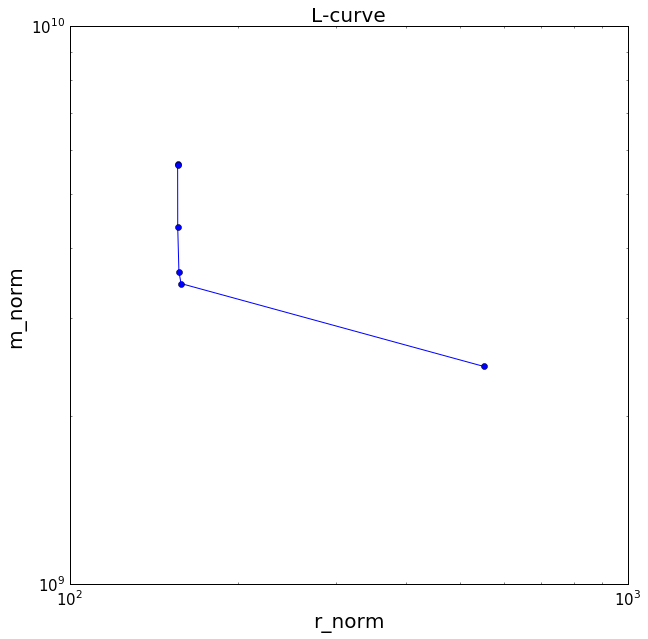

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
